In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

In [7]:
conn = sqlite3.connect('sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [8]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


# 1) What's the mean of film rental duration ?

In [9]:
df['film_rental_duration'].mean()

4.935489902767389

# 2) What's the most common rental duration ?

<Axes: xlabel='film_rental_duration'>

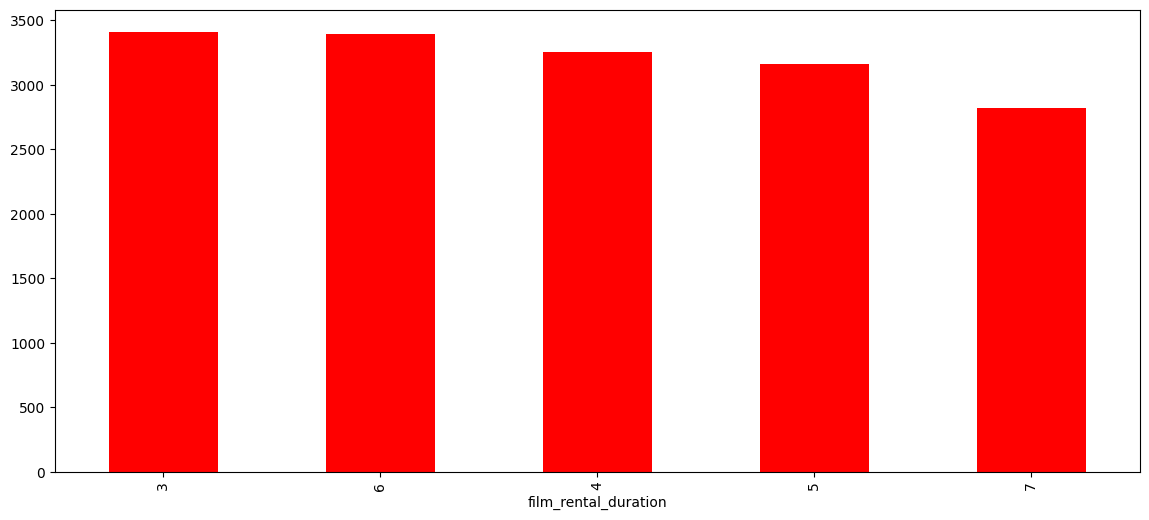

In [12]:
df['film_rental_duration'].value_counts().plot(kind='bar', figsize=(14,6), color='red')

# 3) What is the most common rental rate

<Axes: ylabel='count'>

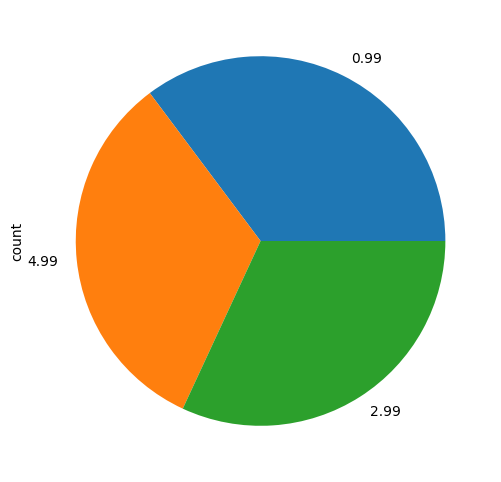

In [13]:
df['film_rental_rate'].value_counts().plot(kind='pie', figsize=(6,6))

<Axes: xlabel='film_rental_rate'>

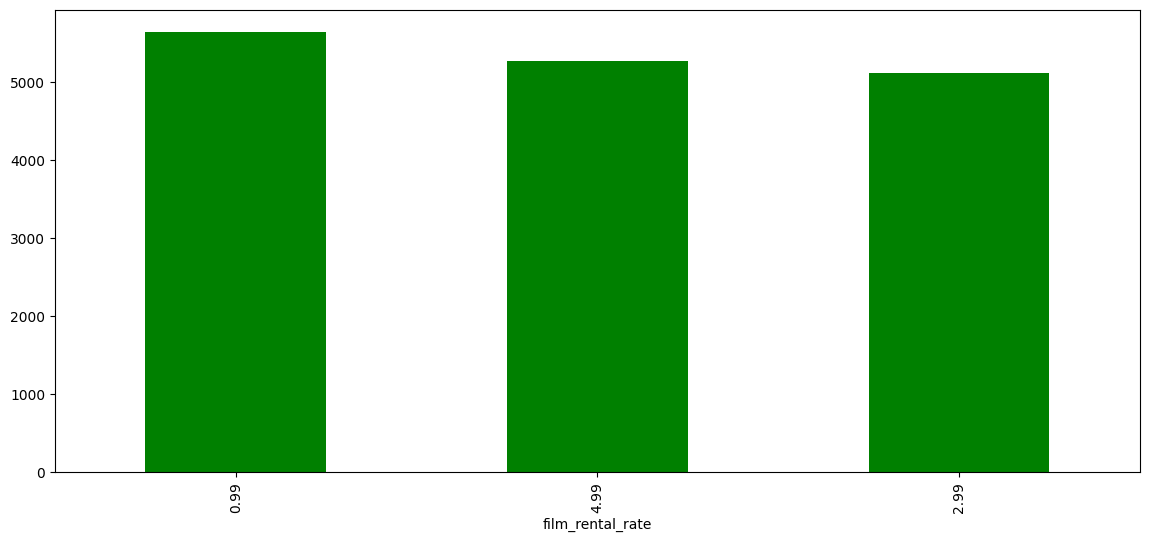

In [15]:
df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(14,6), color='green')

# 4) How is the replacement cost distributed ?

<Axes: >

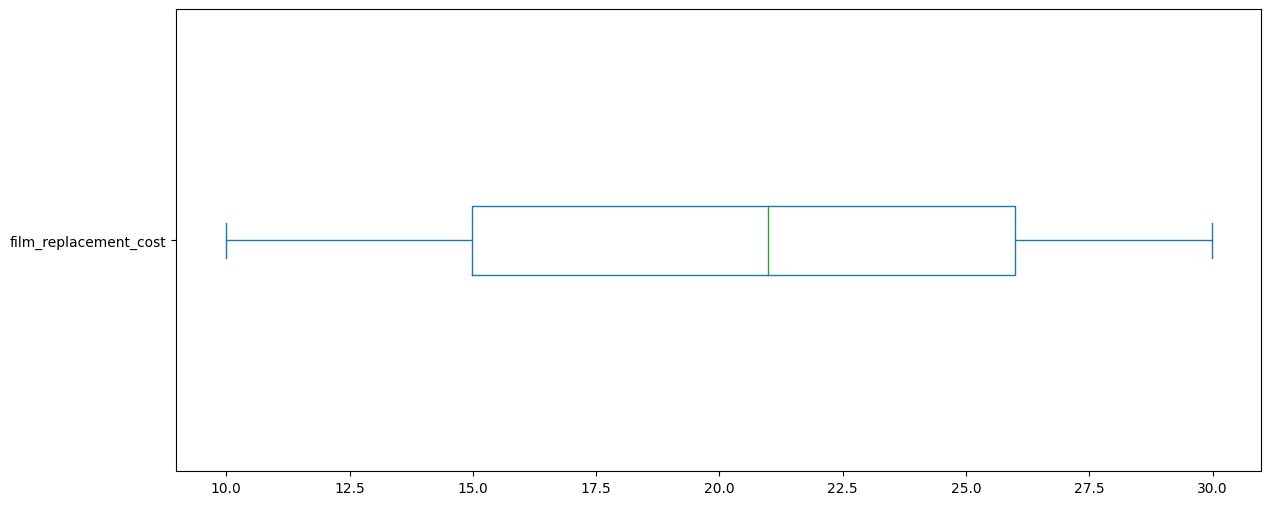

In [16]:
df['film_replacement_cost'].plot(kind='box', vert=False, figsize=(14,6))

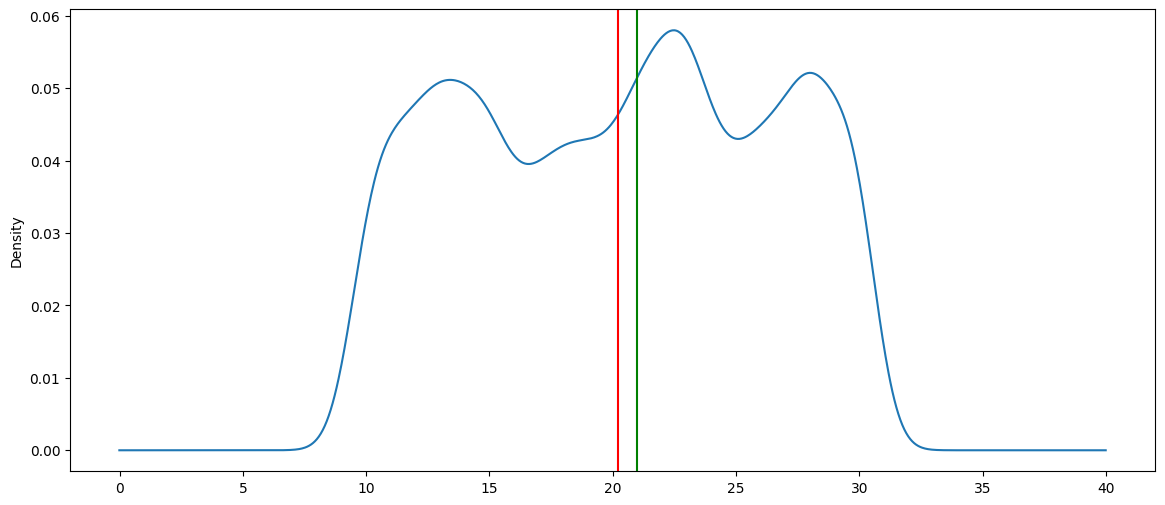

In [17]:
ax = df['film_replacement_cost'].plot(kind='density', figsize=(14,6))
ax.axvline(df['film_replacement_cost'].mean(), color='red')
ax.axvline(df['film_replacement_cost'].median(), color='green')

# 5) How many films of each rating do we have ?

In [18]:
df['film_rating'].value_counts()

film_rating
PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: count, dtype: int64

<Axes: xlabel='film_rating'>

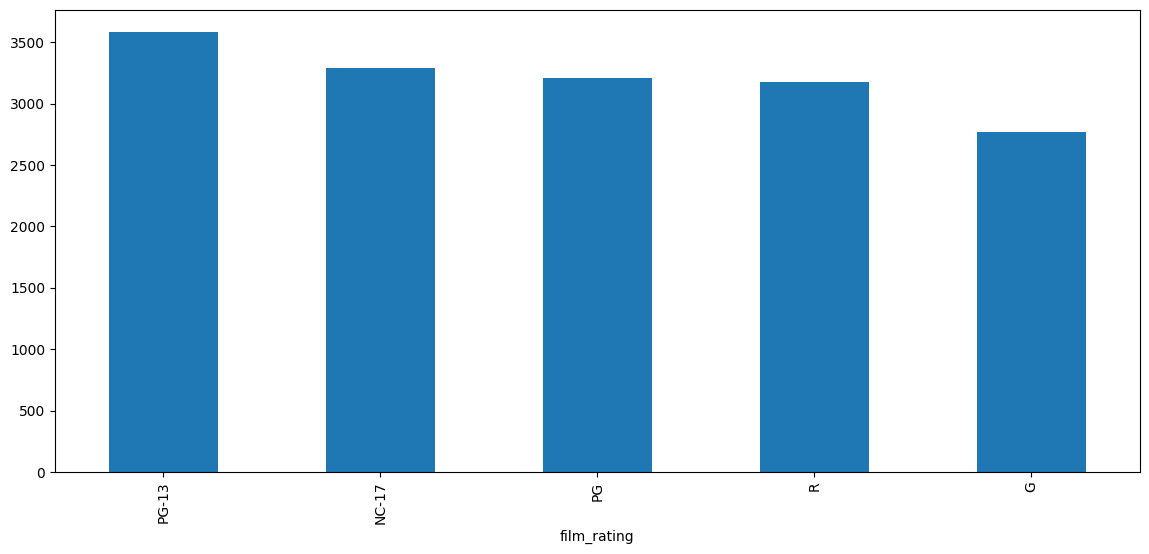

In [19]:
df['film_rating'].value_counts().plot(kind='bar', figsize=(14,6))

# 6) Does the film replacement cost vary depending on film rating ?

<Axes: title={'center': 'film_replacement_cost'}, xlabel='[film_rating]'>

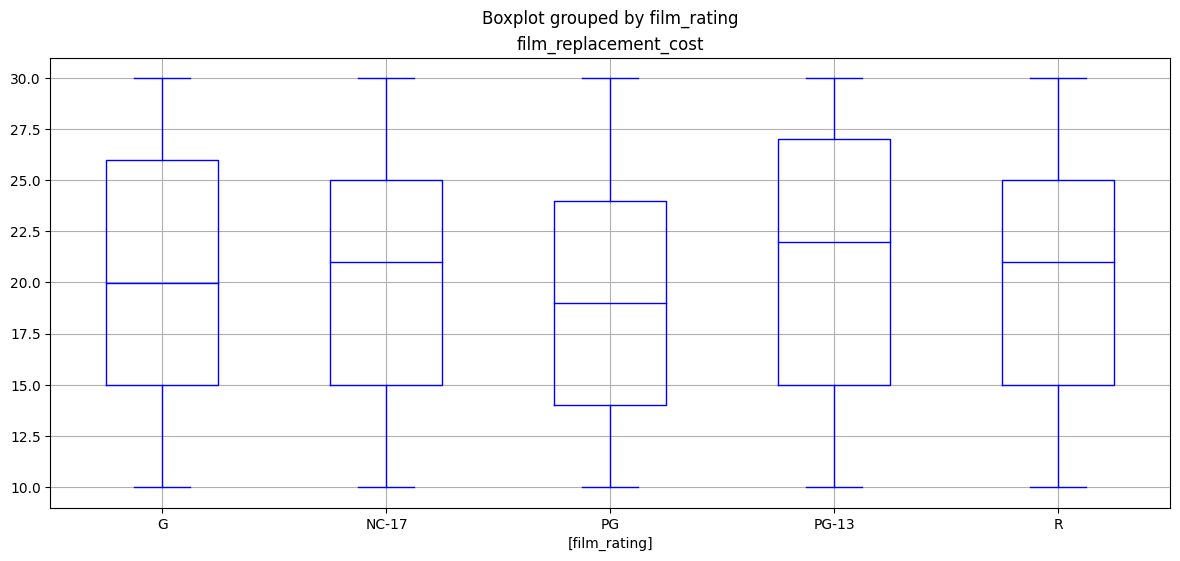

In [21]:
df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating', figsize=(14,6), color='blue')

# 7) Add and calculate a new rental days column

In [23]:
df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis=1)
df['rental_days'].head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8084\1039625861.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis=1)


rental_id
1    1.0
2    3.0
3    7.0
4    9.0
5    8.0
Name: rental_days, dtype: float64

# 8) Analyse the distribution of rental days

In [24]:
df['rental_days'].mean()

4.525944139713763

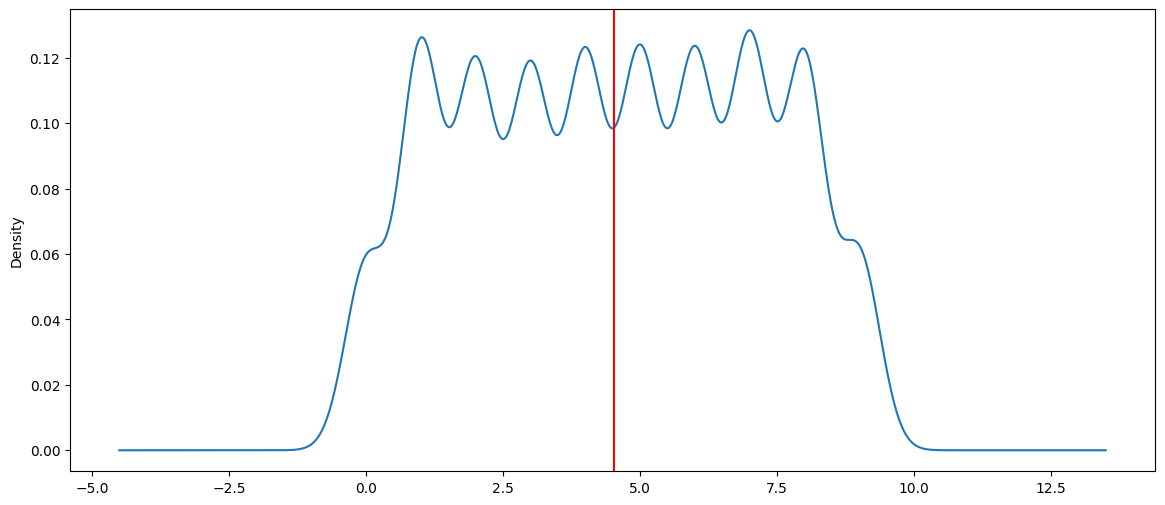

In [25]:
ax = df['rental_days'].plot(kind='density', figsize=(14,6))
ax.axvline(df['rental_days'].mean(), color='red')

# 9) Add and calculate a new film daily rental rate column

In [26]:
df['film_daily_rental_rate'] = df['film_rental_rate'] / df['film_rental_duration']
df['film_daily_rental_rate'].head()

rental_id
1    0.427143
2    0.427143
3    0.427143
4    0.165000
5    0.598000
Name: film_daily_rental_rate, dtype: float64

# 10) Analyse the distribution of film daily rental rate

In [27]:
df['film_daily_rental_rate'].mean()

0.6458262471655329

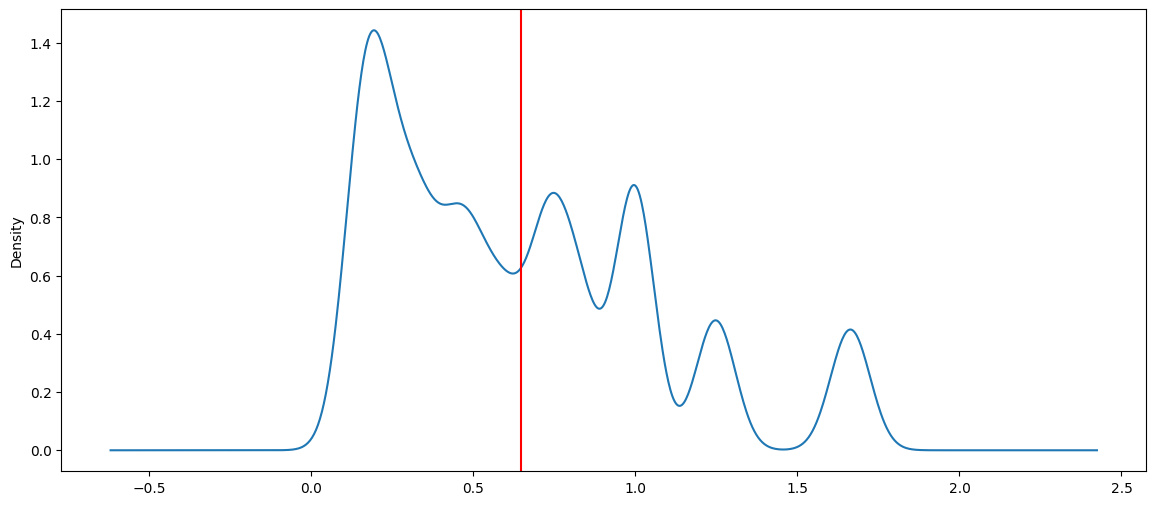

In [28]:
ax = df['film_daily_rental_rate'].plot(kind='density', figsize=(14,6))
ax.axvline(df['film_daily_rental_rate'].mean(), color='red')

# 11) List 10 films with the lowest daily rental rate

In [30]:
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].max()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
13,2005-05-25 00:22:55,2005-05-30 04:28:55,MCWHORTER,1,Lethbridge,KING EVOLUTION,3,4.99,24.99,NC-17,5.0,1.663333
40,2005-05-25 05:09:04,2005-05-27 23:12:04,YEE,1,Lethbridge,MINDS TRUMAN,3,4.99,22.99,PG-13,2.0,1.663333
68,2005-05-25 09:47:31,2005-05-31 10:20:31,ORTIZ,2,Woodridge,TEEN APOLLO,3,4.99,25.99,G,6.0,1.663333
106,2005-05-25 18:18:19,2005-06-04 00:01:19,AUSTIN,2,Woodridge,SHOW LORD,3,4.99,24.99,PG-13,9.0,1.663333
116,2005-05-25 19:27:51,2005-05-26 16:23:51,GARCIA,1,Lethbridge,WIFE TURN,3,4.99,27.99,NC-17,0.0,1.663333
124,2005-05-25 20:46:11,2005-05-30 00:47:11,MENDOZA,1,Lethbridge,BACKLASH UNDEFEATED,3,4.99,24.99,PG-13,4.0,1.663333
135,2005-05-25 21:58:58,2005-06-03 17:50:58,ROYAL,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,8.0,1.663333
152,2005-05-26 00:41:10,2005-06-03 06:05:10,MORGAN,1,Lethbridge,MIDSUMMER GROUNDHOG,3,4.99,27.99,G,8.0,1.663333
155,2005-05-26 01:15:05,2005-06-01 00:03:05,BARBEE,2,Woodridge,BEHAVIOR RUNAWAY,3,4.99,20.99,PG,5.0,1.663333


# 12) How many rentals were made in Lethbridge city ? 

In [31]:
df.loc[df['rental_store_city'] == 'Lethbridge'].shape[0]

7923

# 13) How many rentals of each film rating were made in Lethbridge city ? 

In [33]:
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts()

film_rating
PG-13    1849
NC-17    1625
R        1537
PG       1535
G        1377
Name: count, dtype: int64

<Axes: xlabel='film_rating'>

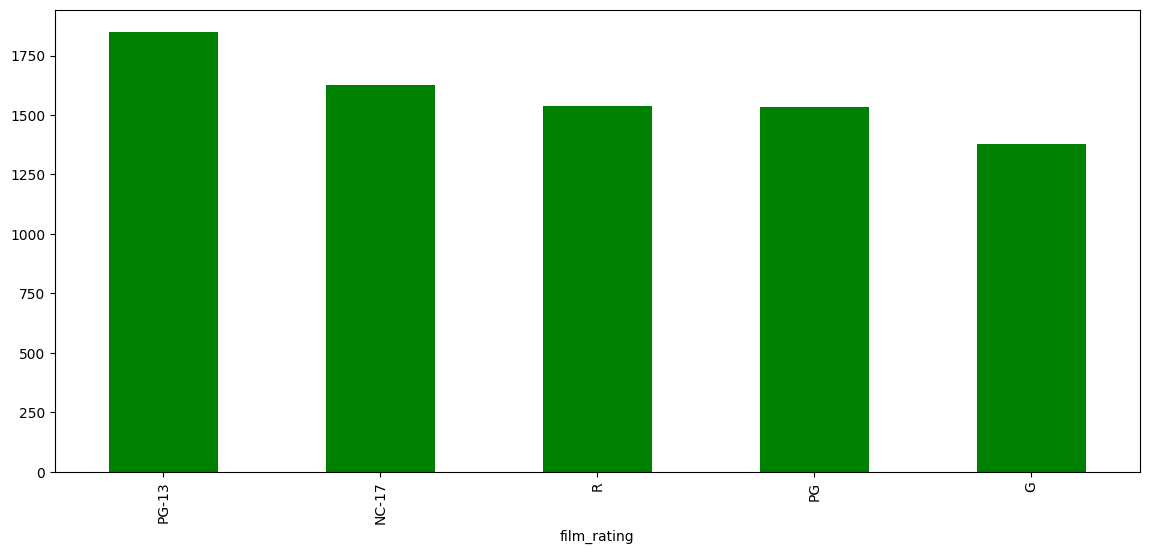

In [35]:
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts().plot(kind='bar', figsize=(14,6), color='Green')

# 14) How many rentals were made in Woodridge city with rental duration higher than 5 days ? 

In [36]:
df.loc[(df['rental_store_city'] == 'Woodrige') & (df['film_rental_duration'] > 5)].shape[0]

0

# 15) How many rentals were made at the store with id 2 or with replacement cost lower than 10.99 USD ? 

In [37]:
df.loc[(df['store_id'] == 2) | (df['film_replacement_cost'] < 10.99).shape[0]]

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,1.0,0.427143
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,3.0,0.427143
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,7.0,0.427143
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,9.0,0.165000
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,8.0,0.598000
...,...,...,...,...,...,...,...,...,...,...,...,...
16045,2005-08-23 22:25:26,2005-08-25 23:54:26,WHITE,1,Lethbridge,COMANCHEROS ENEMY,5,0.99,23.99,R,2.0,0.198000
16046,2005-08-23 22:26:47,2005-08-27 18:02:47,KELLY,2,Woodridge,VOYAGE LEGALLY,6,0.99,28.99,PG-13,3.0,0.165000
16047,2005-08-23 22:42:48,2005-08-25 02:48:48,ELLIS,2,Woodridge,ILLUSION AMELIE,4,0.99,15.99,R,1.0,0.247500
